In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import kagglehub

c:\Users\Şerife GÖKDAŞ\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
path = kagglehub.dataset_download("yasserh/advertising-sales-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Şerife Gökdaş\.cache\kagglehub\datasets\yasserh\advertising-sales-dataset\versions\1


In [44]:
data = pd.read_csv(path + "/AdvertisingBudgetandSales.csv")
data

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [100]:
#veriyi seçtim
X = data[['TV Ad Budget ($)']]
y = data['Sales ($)']

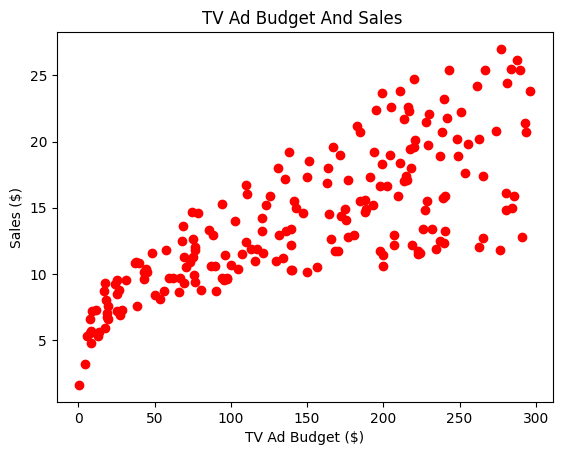

In [101]:
plt.scatter(X, y, color="red")
plt.xlabel("TV Ad Budget ($)")
plt.ylabel("Sales ($)")
plt.title("TV Ad Budget And Sales ")
plt.show()

In [102]:
model = LinearRegression()

In [103]:
# rasgele sayılar ile modeli eğitelim
model.fit(X, y)

LinearRegression()

In [104]:
predictions=model.predict(X)
predictions

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [105]:
# Performans ölçüm işlemi
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

In [106]:
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Coefficient: 0.04753664043301975
Intercept: 7.032593549127695
Mean Squared Error: 10.512652915656757
R^2 Score: 0.611875050850071


In [107]:
# modelin paremetreleri
model.coef_, model.intercept_

(array([0.04753664]), np.float64(7.032593549127695))

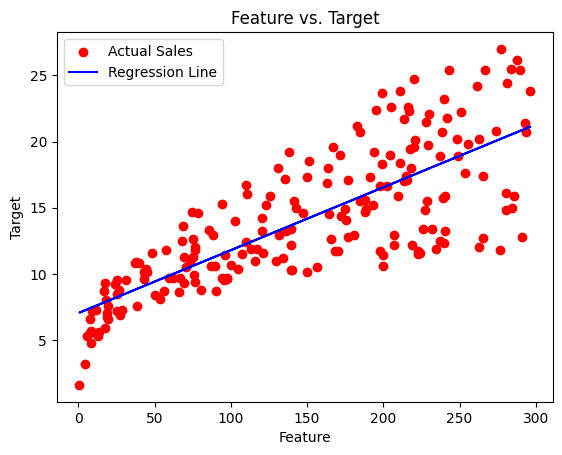

<module 'matplotlib.pyplot' from 'c:\\Users\\Şerife GÖKDAŞ\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [117]:
# şimdi grafiğe çizelim
plt.scatter(X, y, color="red", label="Actual Sales")
plt.plot(X, predictions, color="blue",label="Regression Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Feature vs. Target")
plt.legend()
plt.show()
plt

In [119]:
data.head(75).tail(15)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
60,61,53.5,2.0,21.4,8.1
61,62,261.3,42.7,54.7,24.2
62,63,239.3,15.5,27.3,15.7
63,64,102.7,29.6,8.4,14.0
64,65,131.1,42.8,28.9,18.0
65,66,69.0,9.3,0.9,9.3
66,67,31.5,24.6,2.2,9.5
67,68,139.3,14.5,10.2,13.4
68,69,237.4,27.5,11.0,18.9
69,70,216.8,43.9,27.2,22.3
